## Libraries

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Read data

In [12]:
df = pd.read_csv("../data/available_intro_user_data.csv")


## Exploratory Data Analysis

In [14]:
df.head(5)

,user_id,is_full_club,active_subscriber,order_id,intro_completed_at,intro_delivery_date,product_charged,bottle_charged,bottle_count,price_per_bottle,shipping_charged,order_additional_tax_total,order_total,cc_paid,total_cc_paid_less_taxes,intro_tier_1
0,639619,t,t,3711280,2/1/2021,2/6/2021,60.00,60.00,12,5.00,0.0,0.00,60.00,60.00,60.00,email
1,891895,f,f,6303219,3/1/2022,3/3/2022,39.95,39.95,6,6.65,0.0,3.20,43.15,43.15,39.95,search
2,988261,t,t,8996022,12/21/2022,12/23/2022,44.95,44.95,6,7.49,0.0,3.61,48.56,48.56,44.95,affiliate
3,887233,f,f,6158848,2/19/2022,2/25/2022,79.80,79.80,12,6.65,0.0,7.02,86.82,86.82,79.80,affiliate
4,594227,t,t,3454370,12/16/2020,12/23/2020,19.95,19.95,6,3.32,0.0,1.56,21.51,21.51,19.95,email


### Questions
- Are there any missing values in the dataset, and if so, how should they be handled?
- Are there any outliers or anomalies in the data that need to be addressed?
- What is the proportion of users that became full_club?
- How do the distributions of features differ between full club members and non-members?
- Which month of the year are users who just sign up most likely to become full_club?
- Which day of the week are users who just sign up most likely to become full_club?
- Can new features be derived from existing ones to improve predictive performance?
- How is the relationship between intro_tier and users becoming full_club?

#### Are there any missing values in the dataset, and if so, how should they be handled?
#### Are there any outliers or anomalies in the data that need to be addressed?

In [15]:
df.describe()

,user_id,order_id,product_charged,bottle_charged,bottle_count,price_per_bottle,shipping_charged,order_additional_tax_total,order_total,cc_paid,total_cc_paid_less_taxes
count,4.665500e+05,4.665500e+05,466550.000000,466550.000000,466550.000000,466550.000000,466550.000000,466550.000000,466550.000000,462128.000000,466550.000000
mean,7.883521e+05,5.625940e+06,40.672136,40.672136,7.499526,5.373628,0.549887,2.879858,44.101881,43.965704,40.700342
std,1.517667e+05,2.256650e+06,19.549098,19.549098,2.597790,1.676031,2.710716,1.769199,20.093676,19.995647,18.979802
min,2.607000e+04,2.590242e+06,-64.050000,-64.050000,3.000000,-10.670000,0.000000,0.000000,-57.020000,0.610000,0.000000
25%,6.591322e+05,3.814855e+06,29.950000,29.950000,6.000000,4.990000,0.000000,1.930000,32.050000,32.050000,29.950000
50%,7.809165e+05,4.887125e+06,39.950000,39.950000,6.000000,5.000000,0.000000,2.650000,42.330000,42.330000,39.950000
75%,9.149758e+05,6.965418e+06,39.950000,39.950000,6.000000,6.650000,0.000000,3.590000,44.040000,44.040000,39.950000
max,1.101619e+06,1.143039e+07,350.000000,350.000000,12.000000,29.160000,124.000000,29.700000,373.100000,308.000000,308.000000


As one can see, there is some strange values such as negative values on 'product_charged, bottle_charged', 'price_per_bottle' and 'order_total'. However, the number of occurrences is not that large:

In [21]:
print("Number of negative values in product_charged:", (df['product_charged'] < 0).sum(), "\nNumber of negative values in bottle_charged:", (df['bottle_charged'] < 0).sum(), "\nNumber of negative values in price_per_bottle:", (df['price_per_bottle'] < 0).sum(), "\nNumber of negative values in order_total:", (df['order_total'] < 0).sum())

Number of negative values in product_charged: 2 
Number of negative values in bottle_charged: 2 
Number of negative values in price_per_bottle: 2 
Number of negative values in order_total: 2


Also, there is a considerable amount of NaN values in the 'intro_tier_1' field

In [17]:
df.isnull().sum()

user_id                           0
is_full_club                      0
active_subscriber                 0
order_id                          0
intro_completed_at                0
intro_delivery_date               0
product_charged                   0
bottle_charged                    0
bottle_count                      0
price_per_bottle                  0
shipping_charged                  0
order_additional_tax_total        0
order_total                       0
cc_paid                        4422
total_cc_paid_less_taxes          0
intro_tier_1                  27220
dtype: int64

#### What is the proportion of users that became full_club?

There is an imbalance in the number of users who have become full_club

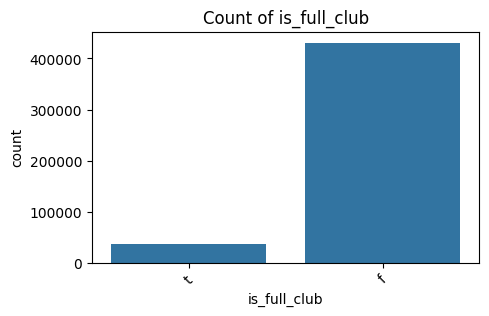

In [29]:
plt.figure(figsize=(5, 3))
sns.countplot(x='is_full_club', data=df)
plt.title("Count of is_full_club")
plt.xticks(rotation=45)
plt.show()

In [88]:
full_club_members = df[df['is_full_club'] == 't'].shape[0]
total = df.shape[0]

percentage_full_club = (full_club_members / total) * 100
print(percentage_full_club)

7.681277462222698


#### How do the distributions of features differ between full club members and non-members?

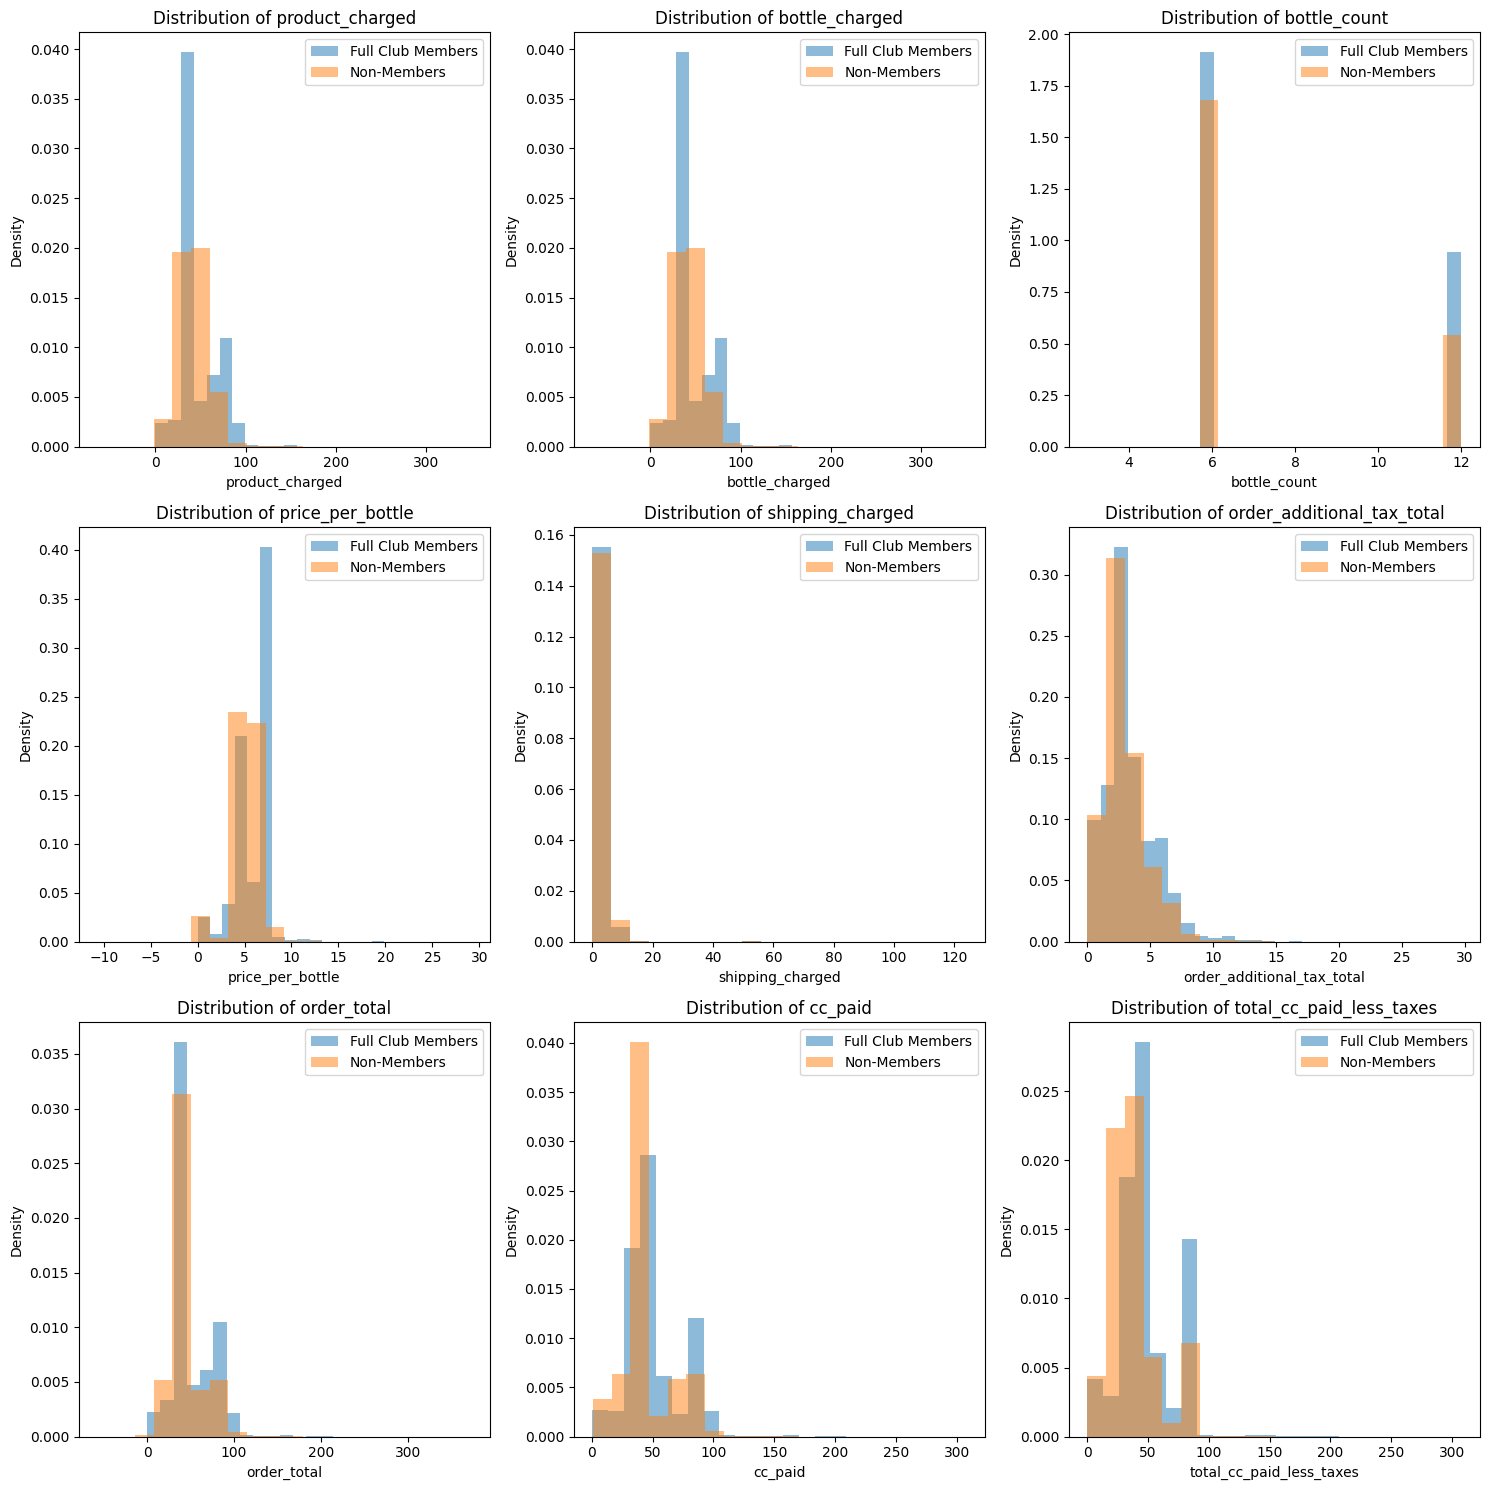

In [45]:
full_club_members = df[df['is_full_club'] == 't']
non_members = df[df['is_full_club'] == 'f']

features_to_compare = ['product_charged', 'bottle_charged', 'bottle_count', 'price_per_bottle', 'shipping_charged', 'order_additional_tax_total', 'order_total', 'cc_paid', 'total_cc_paid_less_taxes'] 

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, feature in enumerate(features_to_compare):
    full_club_members_feature = full_club_members[feature].dropna()
    non_members_feature = non_members[feature].dropna()
    
    row = i // 3
    col = i % 3
    axs[row, col].hist(full_club_members_feature, bins=20, alpha=0.5, label='Full Club Members', density=True)
    axs[row, col].hist(non_members_feature, bins=20, alpha=0.5, label='Non-Members', density=True)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    axs[row, col].set_title('Distribution of ' + feature)
    axs[row, col].legend()
    

plt.tight_layout()

plt.show()


#### Which month of the year are users who just sign up most likely to become full_club?

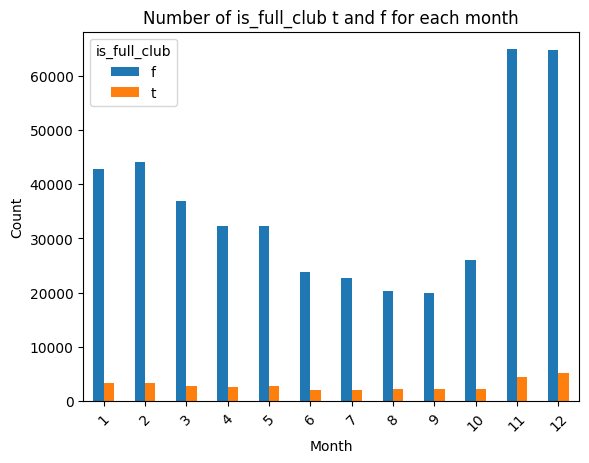

In [49]:
df['intro_completed_at'] = pd.to_datetime(df['intro_completed_at'], format='%m/%d/%Y')
df['intro_completed_at_MONTH'] = df['intro_completed_at'].dt.month
df.groupby(['intro_completed_at_MONTH', 'is_full_club']).size().unstack(fill_value=0).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of is_full_club t and f for each month')
plt.legend(title='is_full_club')
plt.xticks(rotation=45)
plt.show()

In [53]:
grouped = df.groupby(['intro_completed_at_MONTH', 'is_full_club']).size().unstack(fill_value=0)

grouped['is_full_club_total'] = grouped['t'] + grouped['f']
grouped['t_percent'] = grouped['t'] / grouped['is_full_club_total'] * 100

print("Month\tPercentage of users becoming 'full_club'")
for month, percent in grouped['t_percent'].items():
    print(f"{month}\t{percent:.2f}%")

Month	Percentage of users becoming 'full_club'
1	7.46%
2	7.17%
3	7.22%
4	7.58%
5	7.79%
6	8.13%
7	8.43%
8	10.12%
9	10.20%
10	8.25%
11	6.40%
12	7.47%


Users who bought on August/September seems to be more likely to become full_club. Probably due to the beginning of Fall and the Winter after that, with holidays such as Thanksgiving, Christimas and New Year's Eve, and also a a colder weather that may encourage people to stay indoors and enjoy a glass of wine. So they probably antecipated that and took advantage of the wine subscription.

However, users who bought on the November and December probably only bought some bottles of wine for the holidays but they are not a wine connoisseur.

#### Which day of the week are users who just sign up most likely to become full_club?

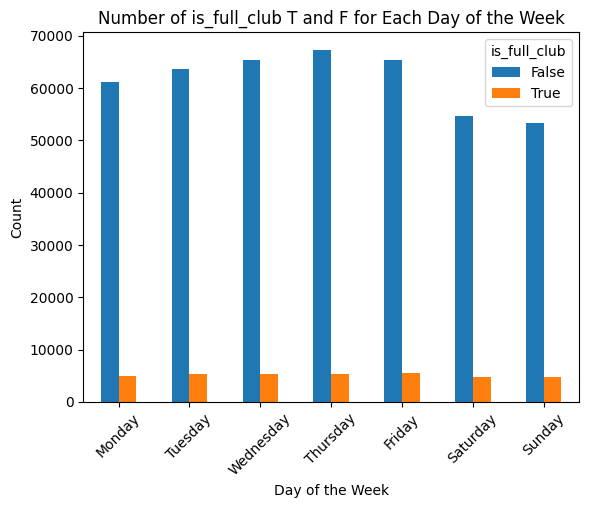

In [74]:
df['intro_completed_at'] = pd.to_datetime(df['intro_completed_at'], format='%m/%d/%Y')
df['intro_completed_DAY_OF_WEEK'] = df['intro_completed_at'].dt.dayofweek
df.groupby(['intro_completed_DAY_OF_WEEK', 'is_full_club']).size().unstack(fill_value=0).plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of is_full_club T and F for Each Day of the Week')
plt.legend(title='is_full_club', labels=['False', 'True'])
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()


In [80]:
grouped = df.groupby(['intro_completed_DAY_OF_WEEK', 'is_full_club']).size().unstack(fill_value=0)
grouped['is_full_club_total'] = grouped['t'] + grouped['f']
grouped['t_percent'] = grouped['t'] / grouped['is_full_club_total'] * 100
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


print("Day of Week\tPercentage of users becoming 'full_club'")
for day, percent in grouped['t_percent'].items():
    print(f"{days_list[day]}    {percent:.2f}%")

Day of Week	Percentage of users becoming 'full_club'
Monday    7.52%
Tuesday    7.63%
Wednesday    7.46%
Thursday    7.45%
Friday    7.71%
Saturday    8.05%
Sunday    8.08%


Users who make purchases on weekends appear to have a slightly increased likelihood of becoming full_club. However the disparity seems negligible

#### Can new features be derived from existing ones to improve predictive performance?

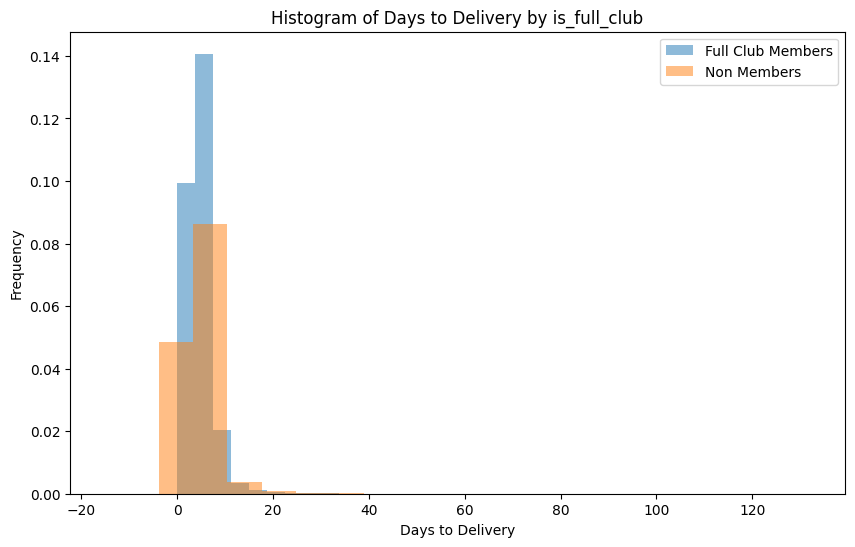

In [70]:
df['intro_completed_at'] = pd.to_datetime(df['intro_completed_at'], format='%m/%d/%Y')
df['intro_delivery_date'] = pd.to_datetime(df['intro_delivery_date'], format='%m/%d/%Y')
df['days_to_delivery'] = (df['intro_delivery_date'] - df['intro_completed_at']).dt.days

full_club_members = df[df['is_full_club'] == 't']
non_members = df[df['is_full_club'] == 'f']

plt.figure(figsize=(10, 6))
plt.hist(full_club_members['days_to_delivery'], bins=20, alpha=0.5, label='Full Club Members', density=True)#, range=(-1, 50))
plt.hist(non_members['days_to_delivery'], bins=20, alpha=0.5, label='Non Members', density=True)#, range=(-1, 50))
plt.xlabel('Days to Delivery')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Days to Delivery by is_full_club')
plt.show()

In [73]:
df.groupby('is_full_club')['days_to_delivery'].describe()

,count,mean,std,min,25%,50%,75%,max
is_full_club,,,,,,,,
f,430713.0,4.819211,3.087991,-11.0,3.0,4.0,6.0,132.0
t,35837.0,4.659486,2.814907,-15.0,3.0,4.0,6.0,60.0


Full Club members experienced slightly expedited delivery times for their orders. However, no substantial or noticeably significant disparity was evident

#### What is the relationship between intro_tier and users becoming full_club?

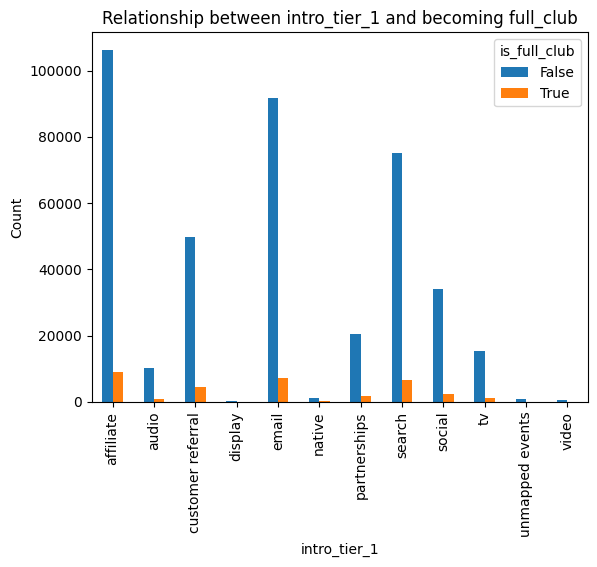

In [82]:
df.groupby(['intro_tier_1', 'is_full_club']).size().unstack(fill_value=0).plot(kind='bar', stacked=False)
plt.title('Relationship between intro_tier_1 and becoming full_club')
plt.xlabel('intro_tier_1')
plt.ylabel('Count')
plt.legend(title='is_full_club', labels=['False', 'True'])
plt.show()


In [83]:
grouped = df.groupby(['intro_tier_1', 'is_full_club']).size().unstack(fill_value=0)

grouped['is_full_club_total'] = grouped['t'] + grouped['f']
grouped['t_percent'] = grouped['t'] / grouped['is_full_club_total'] * 100

print("Month\tPercentage of users becoming 'full_club'")
for intro_tier, percent in grouped['t_percent'].items():
    print(f"{intro_tier}\t{percent:.2f}%")

Month	Percentage of users becoming 'full_club'
affiliate	7.74%
audio	7.11%
customer referral	8.09%
display	6.11%
email	7.32%
native	7.62%
partnerships	7.40%
search	8.16%
social	6.41%
tv	6.61%
unmapped events	5.81%
video	4.95%


Search has the higher probability of users turning into full_club. Probably due to this type of users are already inclined to join a wine subscription club

Also, customer referral also has a good probability, probably due to the trust of friends in the referral.

## Sumary

1 - Are there any missing values in the dataset, and if so, how should they be handled?
<br>
NaN values on 'intro_tier_1' --> could be treated as a new label
<br>
<br>
2 - Are there any outliers or anomalies in the data that need to be addressed?
<br>
Insignificant amount of negative values, and does not seem to have outliers
<br>
<br>
3 - What is the proportion of users that became full_club?
<br>
7.68%
<br>
<br>
How do the distributions of features differ between full club members and non-members?
<br>
R - It does not seem to have significative differences
<br>
<br>
5 - Which month of the year are users who just sign up most likely to become full_club?
<br>
Users who bought on August/September seems to be more likely to become full_club. Probably due to the beginning of Fall and the Winter after that, with holidays such as Thanksgiving, Christimas and New Year's Eve, and also a a colder weather that may encourage people to stay indoors and enjoy a glass of wine. So they probably antecipated that and took advantage of the wine subscription.

However, users who bought on the November and December probably only bought some bottles of wine for the holidays but they are not a wine connoisseur.
<br>
<br>
6 - Which day of the week are users who just sign up most likely to become full_club?
<br>
Users who make purchases on weekends appear to have a slightly increased likelihood of becoming full_club. However the disparity seems negligible
<br>
<br>
7 - Can new features be derived from existing ones to improve predictive performance?
<br>
Days to delivery may be a good new feature
<br>
<br>
8 - What is the relationship between intro_tier and users becoming full_club?
<br>
Users who found Firstleaf through Search and Customer referral tends to have a higher probability of becoming full club 